In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [32]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

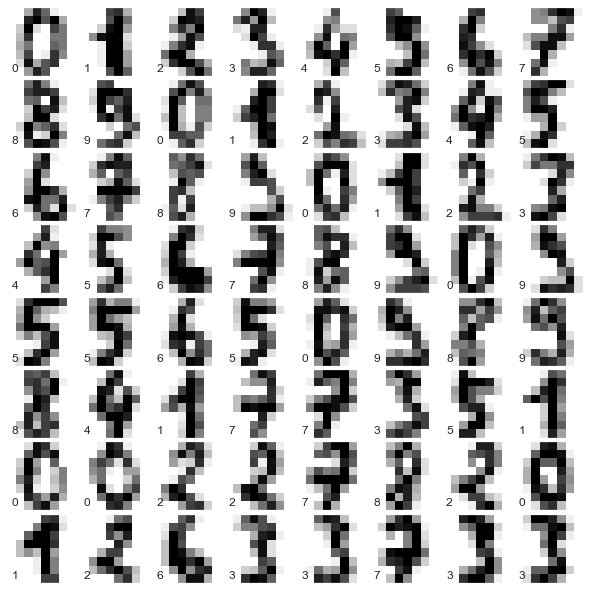

In [52]:
# set up the figure
fig = plt.figure(figsize=(8, 8))  #設定圖形的大小（寬, 高）
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
# 把前 64個手寫數字顯示在子圖形
for i in range(64): 
    # 在 8 x 8 網格中第 i + 1 個位置繪製子圖形，並且關掉座標軸刻度
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[]) 
    # 顯示圖形，色彩選擇灰階
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # 在左下角標示目標值
    ax.text(0, 7, str(digits.target[i]))

    
plt.show()

In [65]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000, bootstrap=True)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [74]:
from sklearn import tree
import graphviz 

In [85]:
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.96      0.98        45
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



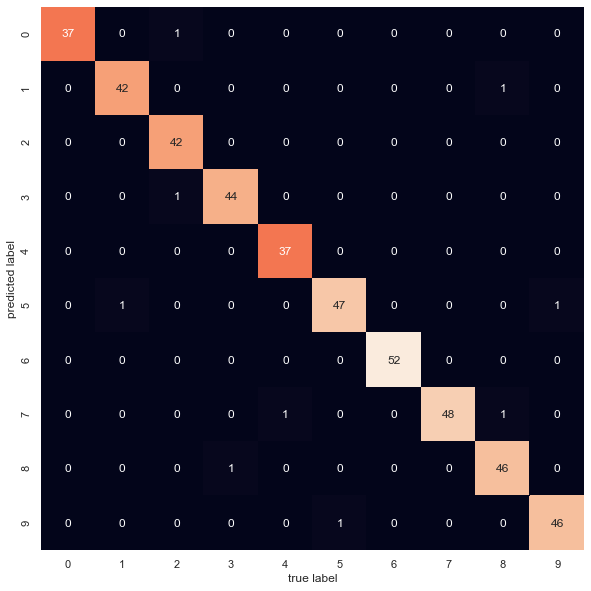

In [59]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
fig = plt.figure(figsize=(10, 10))
fig= sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');